In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the data

In [2]:
df = pd.read_parquet('../Data/features_tfidf_removed_categories.parquet.gz')
df.head()

,bagsandluggage,beautyandhealth,capsandhats,drinkware,hoodiesandjackets,kidsapparel,petsupplies,sportsandfitness
CustomerID,,,,,,,,
12347,0.568189,0.000000,0.388631,0.463974,0.366188,0.215148,0.0,0.361210
12348,0.000000,0.000000,0.000000,0.636778,0.000000,0.590556,0.0,0.495740
12350,0.000000,0.000000,0.974051,0.000000,0.000000,0.000000,0.0,0.226331
12356,0.203496,0.436919,0.000000,0.498515,0.393450,0.462330,0.0,0.388101
12359,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000


# Mean scaling of the TF-IDF features

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data simultaneously
X = scaler.fit_transform(df.to_numpy())

# PCA

In [ ]:
# from sklearn.decomposition import PCA

# # Initialize PCA
# pca = PCA()

# # Fit PCA to the mean-scaled data
# pca.fit(X)

# plt.plot(list(range(1, df.shape[1] + 1)), np.cumsum(pca.explained_variance_ratio_), marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')

NOTE: Keep 7 principal components.

In [ ]:
# pca = PCA(n_components=7)

# # Fit PCA to the mean-scaled data and transform it
# X = pca.fit_transform(X)

# Clustering

### 1. K-Means

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Store the evaluation scores
inertia = []
silhouette_scores = []
ch_score = []
davies_bouldin_scores = []

# Try several K number of clusters
k_values = range(3, 15)
for k in k_values:
    print(f"k = {k}")

    # Storing the raw scores for each model
    inertia_samples = []
    silhouette_score_samples = []
    ch_score_samples = []
    db_score_samples = []

    # Cluster 15 times to get the average evaluation scores later on
    for _ in range(15):
        print(f"\tj = {_}")
        
        # Clustering Step
        kmeans = KMeans(n_clusters=k, 
                        init='k-means++', 
                        algorithm='elkan',
                        n_init=10)
        kmeans.fit(X)

        # Getting the cluster labels
        labels = kmeans.labels_

        # Get the Inertia (for elbow method)
        inertia_samples.append(kmeans.inertia_)
    
        # Get the Silhouette score
        silhouette_score_samples.append(silhouette_score(X, labels))

        # Calinski-Harabasz score 
        ch_score_samples.append(calinski_harabasz_score(X, labels))
        
        # Davies Bouldin Score
        db_score_samples.append(davies_bouldin_score(X, labels))


    # Mean of the metrics
    inertia.append(inertia_samples)
    silhouette_scores.append(silhouette_score_samples)
    ch_score.append(ch_score_samples)
    davies_bouldin_scores.append(db_score_samples)

k = 3
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 4
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 5
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 6
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 7
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 8
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 9
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 10
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 11
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	

Text(0.5, 1.0, 'Davies Bouldin Score (ideal: close to zero)')

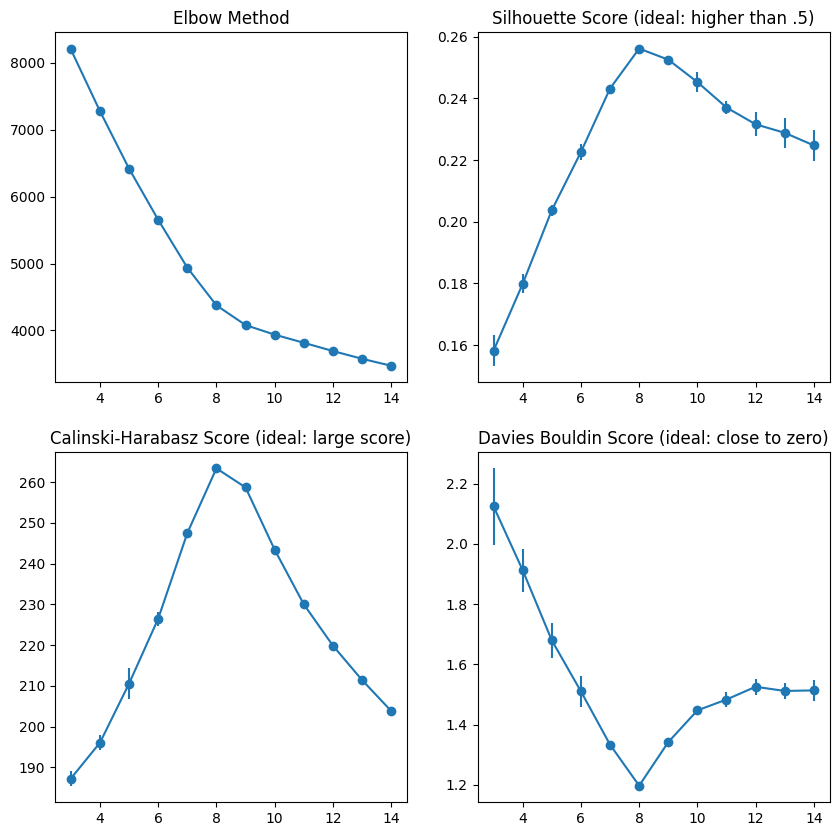

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(k_values, np.mean(inertia, axis=1), linestyle='-', marker='o')
axs[0, 0].errorbar(k_values, np.mean(inertia, axis=1), yerr = np.std(inertia, axis=1, ddof=1), fmt ='none')
axs[0, 0].set_title('Elbow Method')

axs[0, 1].plot(k_values, np.mean(silhouette_scores, axis=1), linestyle='-', marker='o')
axs[0, 1].errorbar(k_values, np.mean(silhouette_scores, axis=1), yerr = np.std(silhouette_scores, axis=1, ddof=1), fmt ='none')
axs[0, 1].set_title('Silhouette Score (ideal: higher than .5)')

axs[1, 0].plot(k_values, np.mean(ch_score, axis=1), linestyle='-', marker='o')
axs[1, 0].errorbar(k_values, np.mean(ch_score, axis=1), yerr = np.std(ch_score, axis=1, ddof=1), fmt ='none')
axs[1, 0].set_title('Calinski-Harabasz Score (ideal: large score)')

axs[1, 1].plot(k_values, np.mean(davies_bouldin_scores, axis=1), linestyle='-', marker='o')
axs[1, 1].errorbar(k_values, np.mean(davies_bouldin_scores, axis=1), yerr = np.std(davies_bouldin_scores, axis=1, ddof=1), fmt ='none')
axs[1, 1].set_title('Davies Bouldin Score (ideal: close to zero)')

### NOTE: 8 clusters may be a good candidate (elbow at k=8, silhouette and Calinski-Harabasz scores peak at k=8, and the Davies Bouldin score is lowest at k=8).

# Final Clustering model

We choose a K-Means model with ``k = 8``.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans = KMeans(n_clusters=8, 
                init='k-means++', 
                algorithm='elkan',
                n_init=10)
kmeans.fit(X)

# Put the labels in the original dataframe
df['cluster'] = kmeans.labels_
df.head()

,bagsandluggage,beautyandhealth,capsandhats,drinkware,hoodiesandjackets,kidsapparel,petsupplies,sportsandfitness,cluster
CustomerID,,,,,,,,,
12347,0.568189,0.000000,0.388631,0.463974,0.366188,0.215148,0.0,0.361210,0
12348,0.000000,0.000000,0.000000,0.636778,0.000000,0.590556,0.0,0.495740,7
12350,0.000000,0.000000,0.974051,0.000000,0.000000,0.000000,0.0,0.226331,2
12356,0.203496,0.436919,0.000000,0.498515,0.393450,0.462330,0.0,0.388101,7
12359,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,2


# Descriptives

### We load the counts dataframe

In [11]:
df_profiling = pd.read_parquet('../Data/features.parquet.gz').drop(['onesie', 'Gift Cards', 'car & motorbike'], axis=1)

# Turn the counts into 1 or 0 (customer bought a product from the category or not)
for col in df_profiling.columns:
    df_profiling[col] = np.where(df_profiling[col] > 0, 1, 0)
    
df_profiling = pd.merge(df_profiling, df[['cluster']]
                     ,how='inner'
                     ,left_index=True
                     ,right_index=True)
df_profiling.head()

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness,cluster
CustomerID,,,,,,,,,,,,
12347,1,1,1,1,1,1,0,1,1,0,1,0
12348,0,1,0,1,1,0,0,1,1,0,1,7
12350,1,0,0,0,1,0,0,1,0,0,1,2
12356,0,1,1,1,1,1,1,1,1,0,1,7
12359,1,0,0,0,1,0,0,1,0,0,0,2


In [12]:
df_profiling.shape

(1317, 12)

We lost around 100 customers since they bought from categories that were dropped.

### Cluster membership

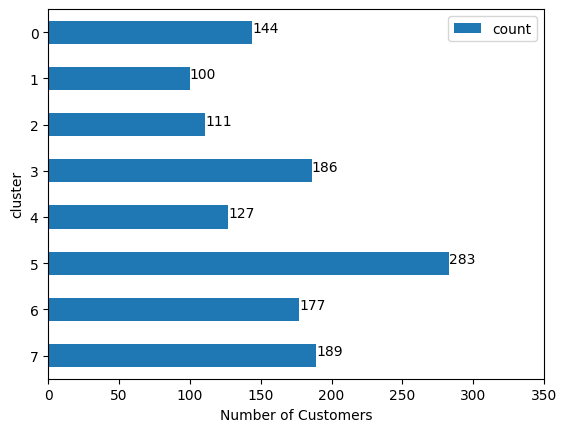

In [18]:
counts = pd.DataFrame(df_profiling['cluster'].value_counts().sort_index(ascending=False))

ax = counts.plot(kind='barh')

ax.set_xlabel('Number of Customers')
ax.set_xlim(0, 350)

for index, value in enumerate(counts['count']):
    ax.text(value, index, str(value))

# Show the plot
plt.show()

### Proportions of each category per cluster

In [34]:
def proportions(cluster_num):
    cluster_num = int(cluster_num)
    return df_profiling.groupby('cluster').sum().query(f'cluster == {cluster_num}') / df_profiling['cluster'].value_counts().sort_index().loc[cluster_num]

### Cluster 0

In [35]:
proportions(0)

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness
cluster,,,,,,,,,,,
0,0.423611,0.694444,0.409722,0.270833,0.875,1.0,0.354167,0.861111,0.805556,0.104167,0.465278


In [36]:
len(df_profiling.query('cluster == 0').index) # number of customers in this category

144

Interested in: Tees, Home and Kitchen, Office, ``Drinkware`` and `Bags and Luggage`.

### Cluster 1

In [37]:
proportions(1)

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness
cluster,,,,,,,,,,,
1,0.54,0.71,0.56,0.49,0.91,0.51,0.42,0.9,0.86,1.0,0.48


In [20]:
len(df_profiling.query('cluster == 1').index)

100

Interested in: Tees, Home and Kitchen, Office, ``Drinkware``, and ``Pet Supplies``.

### Cluster 2

In [38]:
proportions(2)

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness
cluster,,,,,,,,,,,
2,1.0,0.540541,0.396396,0.189189,0.882883,0.27027,0.414414,0.90991,0.747748,0.054054,0.459459


In [ ]:
len(df_profiling.query('cluster == 2').index)

Interested in: Tees, Home and Kitchen, Office, and ``Caps and Hats``.

### Cluster 3

In [39]:
proportions(3)

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness
cluster,,,,,,,,,,,
3,0.456989,0.715054,1.0,0.376344,0.924731,0.5,0.419355,0.88172,0.801075,0.209677,0.623656


In [23]:
len(df_profiling.query('cluster == 3').index)

186

Interested in: Tees, Home and Kitchen, Office, ``Drinkware``. Mid interest in ``Sports and Fitness``.

### Cluster 4

In [40]:
proportions(4)

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness
cluster,,,,,,,,,,,
4,0.354331,0.629921,0.425197,0.299213,0.92126,0.393701,0.283465,0.889764,0.818898,0.094488,1.0


In [25]:
len(df_profiling.query('cluster == 4').index)

127

Interested in: Tees, Home and Kitchen, Office,  ``Sports and Fitness``. Mid interest in ``Drinkware``.

### Cluster 5

In [41]:
proportions(5)

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness
cluster,,,,,,,,,,,
5,0.491166,1.0,0.583039,0.39576,0.925795,0.568905,0.434629,0.890459,0.872792,0.236749,0.586572


In [27]:
len(df_profiling.query('cluster == 4').index)

127

Interested in: Tees, Home and Kitchen, Office,  ``Drinkware``. Mid interest in ``Hoodies and Jackets``, and ``Sports and Fitness``.

### Cluster 6

In [42]:
proportions(6)

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness
cluster,,,,,,,,,,,
6,0.435028,0.548023,0.389831,0.214689,0.870056,0.423729,1.0,0.966102,0.768362,0.107345,0.40678


Interested in: Tees, Home and Kitchen, Office, and  ``Beauty and Health``.

### Cluster 7

In [43]:
proportions(7)

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness
cluster,,,,,,,,,,,
7,0.497354,0.608466,0.534392,1.0,0.89418,0.481481,0.333333,0.888889,0.793651,0.148148,0.544974


Interested in: Tees, Home and Kitchen, Office,  and ``Kids Apparel``. Mid interest in ``Drinkware`` and ``Sports and Fitness``.

# Save the KMeans model using Joblib

In [44]:
from joblib import dump
dump(kmeans, '../Models/kmeans_model_8clusters.joblib')

['../Model/kmeans_model_8clusters.joblib']

# To read the model in order to make predictions just do

```python
from joblib import dump, load

kmeans = load('kmeans_model.joblib')
y_pred = kmeans.predict(X_new)
```

# Remember to perform the exact same transformations to the new data before making predictions.

# Export the cluster labels (use this reference file for EDA)

In [45]:
df_profiling.head()

,Caps and Hats,Drinkware,Hoodies and Jackets,Kids Apparel,Tees,bags & luggage,beauty & health,home & kitchen,office,pet supplies,sports & fitness,cluster
CustomerID,,,,,,,,,,,,
12347,1,1,1,1,1,1,0,1,1,0,1,0
12348,0,1,0,1,1,0,0,1,1,0,1,7
12350,1,0,0,0,1,0,0,1,0,0,1,2
12356,0,1,1,1,1,1,1,1,1,0,1,7
12359,1,0,0,0,1,0,0,1,0,0,0,2


In [46]:
df_profiling[['cluster']].to_parquet('../Data/cluster_labels.parquet.gz', compression='gzip') 

# Reading the cluster labels file (to test)

In [47]:
df_cls = pd.read_parquet('../Data/cluster_labels.parquet.gz')
df_cls.head()

,cluster
CustomerID,
12347,0
12348,7
12350,2
12356,7
12359,2
